In [3]:
import math
import matplotlib.pyplot as plt

len_unit     - длина каждого из ребер

coord_points - координаты точек (рабочего органа)

coord_unit   - координаты точек колена (соединение ребер)

alpha        - угол поворота 1 ребра относительно севера

beta         - прилегающий угол поворота 2 ребра относительно 1

In [4]:
len_unit = 0.4 * math.sqrt(2)
coord_points = [(0.3, 0.3), (0.3, 0.4), (0.3, 0.5), (0.3, 0.6), 
                (0.3, 0.7), (0.3, 0.8), (0.4, 0.8), (0.5, 0.8), 
                (0.6, 0.8), (0.7, 0.8), (0.8, 0.8), (0.8, 0.7), 
                (0.8, 0.6), (0.8, 0.5), (0.8, 0.4), (0.8, 0.3)]
coord_unit, alpha, beta = [], [], []

In [5]:
for (x, y) in coord_points:
    new_alpha = math.atan(x / y) - math.acos((x ** 2 + y ** 2) / (2 * len_unit * math.sqrt(x ** 2 + y ** 2)))
    new_beta = math.acos((2 * len_unit ** 2 - x ** 2 - y ** 2) / (2 * len_unit ** 2))
    
    coord_unit.append((math.sin(new_alpha) * len_unit, math.cos(new_alpha) * len_unit))
    alpha.append(math.pi / 2 - new_alpha)
    beta.append(math.pi - new_beta)

In [6]:
for i, ((x, y), (x1, y1), new_alpha, new_beta) in enumerate(zip(coord_points, coord_unit, alpha, beta)):
    print(f"{(i):>2}. (x, y) = ({x:>4.2f}, {y:>4.2f}) (x1, y1) = ({x1:>5.2f}, {y1:>4.2f})", end=" ")
    print(f"alpha = {(new_alpha * 180 / math.pi):>6.2f}' beta = {(new_beta * 180 / math.pi):>6.2f}'")

 0. (x, y) = (0.30, 0.30) (x1, y1) = (-0.22, 0.52) alpha = 112.98' beta = 135.95'
 1. (x, y) = (0.30, 0.40) (x1, y1) = (-0.26, 0.50) alpha = 116.90' beta = 127.54'
 2. (x, y) = (0.30, 0.50) (x1, y1) = (-0.27, 0.50) alpha = 118.01' beta = 117.95'
 3. (x, y) = (0.30, 0.60) (x1, y1) = (-0.26, 0.50) alpha = 117.07' beta = 107.27'
 4. (x, y) = (0.30, 0.70) (x1, y1) = (-0.23, 0.51) alpha = 114.49' beta =  95.38'
 5. (x, y) = (0.30, 0.80) (x1, y1) = (-0.20, 0.53) alpha = 110.40' beta =  81.92'
 6. (x, y) = (0.40, 0.80) (x1, y1) = (-0.11, 0.55) alpha = 101.20' beta =  75.52'
 7. (x, y) = (0.50, 0.80) (x1, y1) = (-0.01, 0.57) alpha =  91.50' beta =  67.01'
 8. (x, y) = (0.60, 0.80) (x1, y1) = ( 0.09, 0.56) alpha =  81.02' beta =  55.77'
 9. (x, y) = (0.70, 0.80) (x1, y1) = ( 0.20, 0.53) alpha =  68.83' beta =  40.04'
10. (x, y) = (0.80, 0.80) (x1, y1) = ( 0.40, 0.40) alpha =  45.00' beta =   0.00'
11. (x, y) = (0.80, 0.70) (x1, y1) = ( 0.27, 0.50) alpha =  61.20' beta =  40.04'
12. (x, y) = (0.

In [7]:
def draw_background(ax, points):
    for (x, y) in points:
        ax.plot(x, y, 'ro')
    ax.set_xlim(-0.3, 0.9)
    ax.set_ylim(-0.1, 0.9)
    ax.set_ylabel('y, meters')
    ax.set_xlabel('x, meters')
    ax.grid(True)

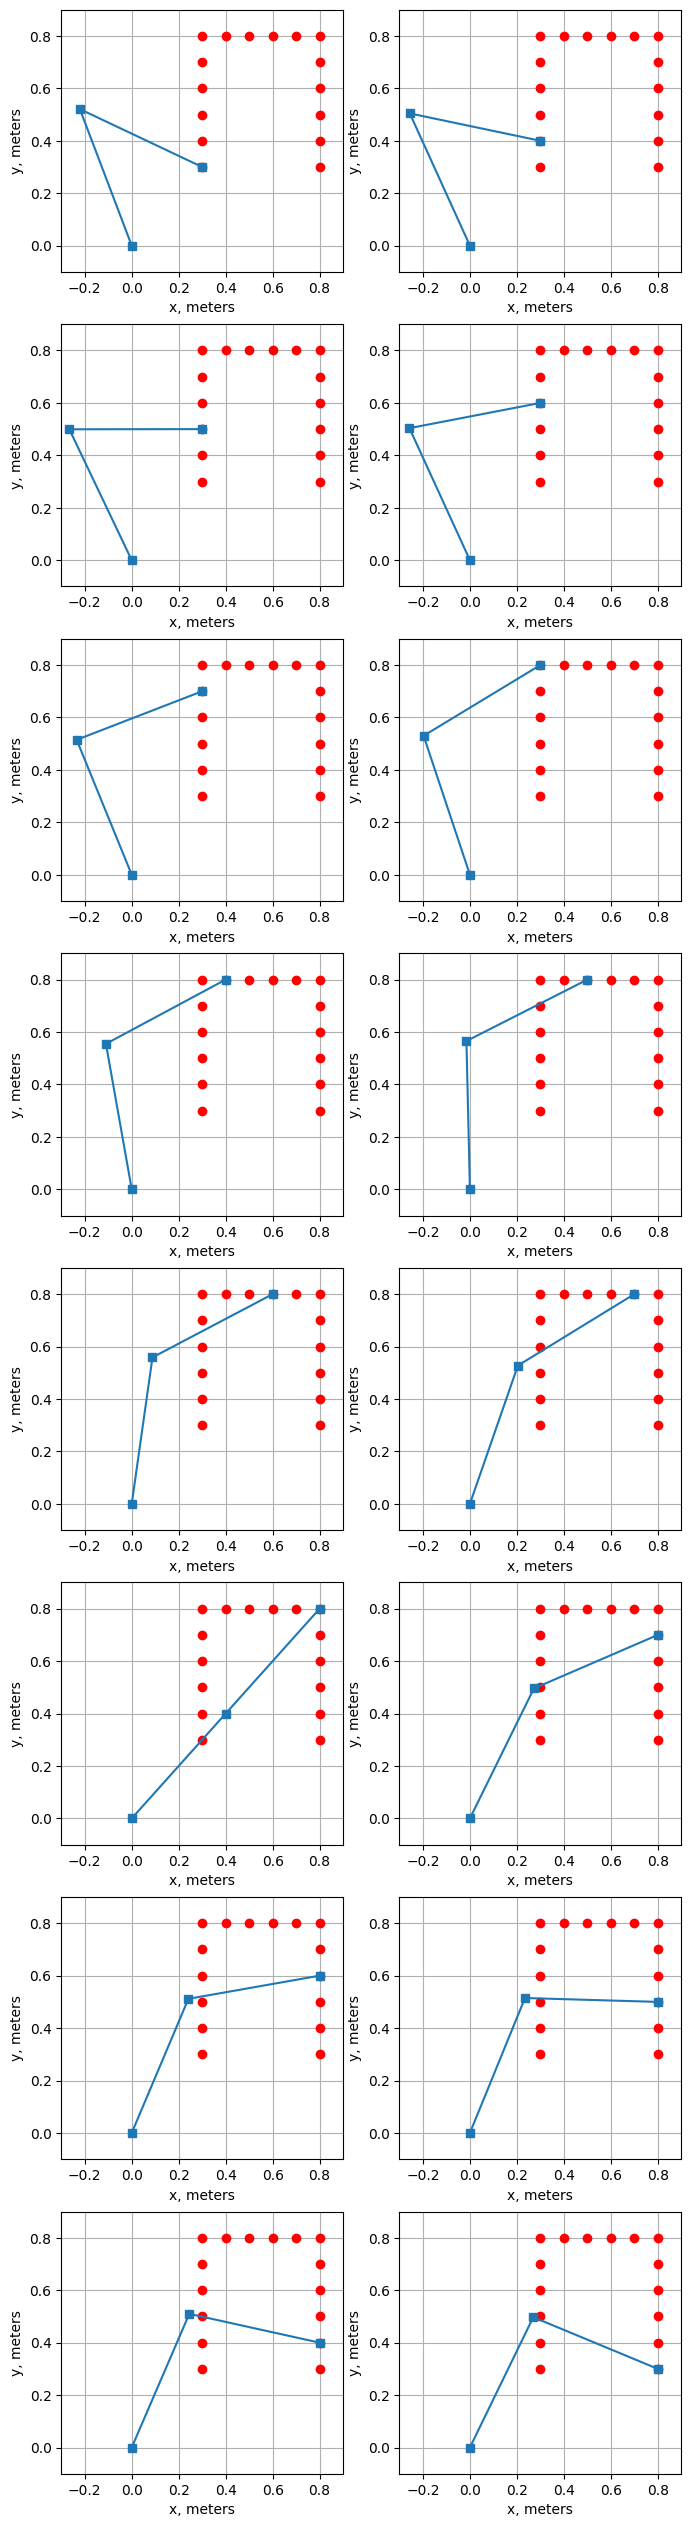

In [8]:
n_rows = (len(coord_points) + 1) // 2
fig, axs = plt.subplots(n_rows, 2, figsize=(8, n_rows * 4))
axs = axs.flatten()

for i, ((x, y), (x1, y1)) in enumerate(zip(coord_points, coord_unit)):
    draw_background(axs[i], coord_points)
    axs[i].plot([0, x1, x], [0, y1, y], marker='s')

plt.show()